In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import pandas as pd

# load iris data
iris = load_iris() 

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

classifier = DecisionTreeClassifier( max_depth = 3, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9833333333333333

In [4]:
cross_val_score(classifier,iris.data,iris.target,cv=20)

array([1.        , 1.        , 0.875     , 1.        , 1.        ,
       1.        , 0.875     , 1.        , 0.875     , 1.        ,
       0.85714286, 0.85714286, 0.85714286, 1.        , 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [7]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2],normalize='all')
cm

array([[0.33333333, 0.        , 0.        ],
       [0.        , 0.3       , 0.        ],
       [0.        , 0.        , 0.36666667]])

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

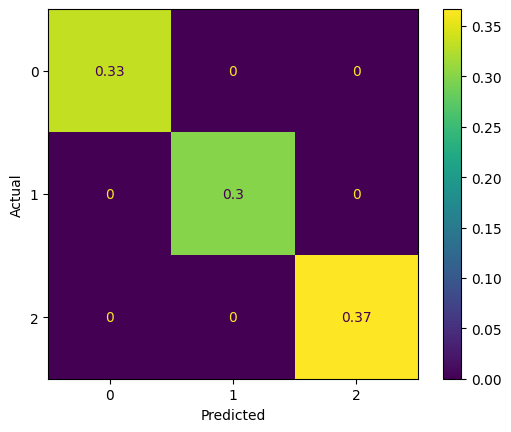

In [9]:
cmp=ConfusionMatrixDisplay(cm)

cmp.plot()
cmp.ax_.set(xlabel='Predicted', ylabel='Actual')


In [10]:
import matplotlib.pyplot as plt

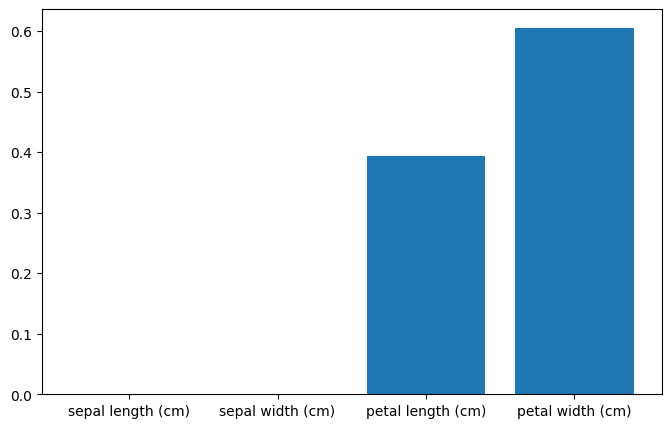

In [13]:
plt.figure(figsize=(8,5))
plt.bar(iris.feature_names, classifier.feature_importances_)
plt.show()

In [ ]:
#Random Forest 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier_rf = RandomForestClassifier(n_estimators = 20, max_depth = 3, criterion = 'gini',
                                        n_jobs=2, random_state=0)

# Train the Classifier to take the training input (X_train) and learn how they relate
# to the training output y_train (the species)
classifier_rf.fit(X_train, y_train)
# Apply the Classifier we trained to the test data (X_test)
y_pred_rf = classifier_rf.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred_rf)

0.9833333333333333

In [22]:
# Create confusion matrix
pd.crosstab(y_test, y_pred_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,23,0,0
1,0,19,0
2,0,1,17
